D:\app\Miniconda3\envs\adv\lib\site-packages\kornia\augmentation\augmentation.py:1830: DeprecationWarning: GaussianBlur is no longer maintained and will be removed from the future versions. Please use RandomGaussianBlur instead.
  warnings.warn(


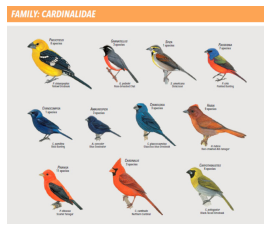

In [1]:
import torch
import kornia
import cv2
import numpy as np

import matplotlib.pyplot as plt

# read the image with OpenCV
img: np.ndarray = cv2.imread('./imgs/birds.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# convert to torch tensor
data: torch.tensor = kornia.image_to_tensor(img, keepdim=False)/255.  # BxCxHxW

plt.axis('off')
plt.imshow(img)
plt.show()

In [4]:
# create the operator
canny = kornia.filters.Canny(low_threshold=0.4, high_threshold=0.5)

# blur the image
x_magnitude, x_canny = canny(data.float())

D:\app\Miniconda3\envs\adv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


D:\app\Miniconda3\envs\adv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


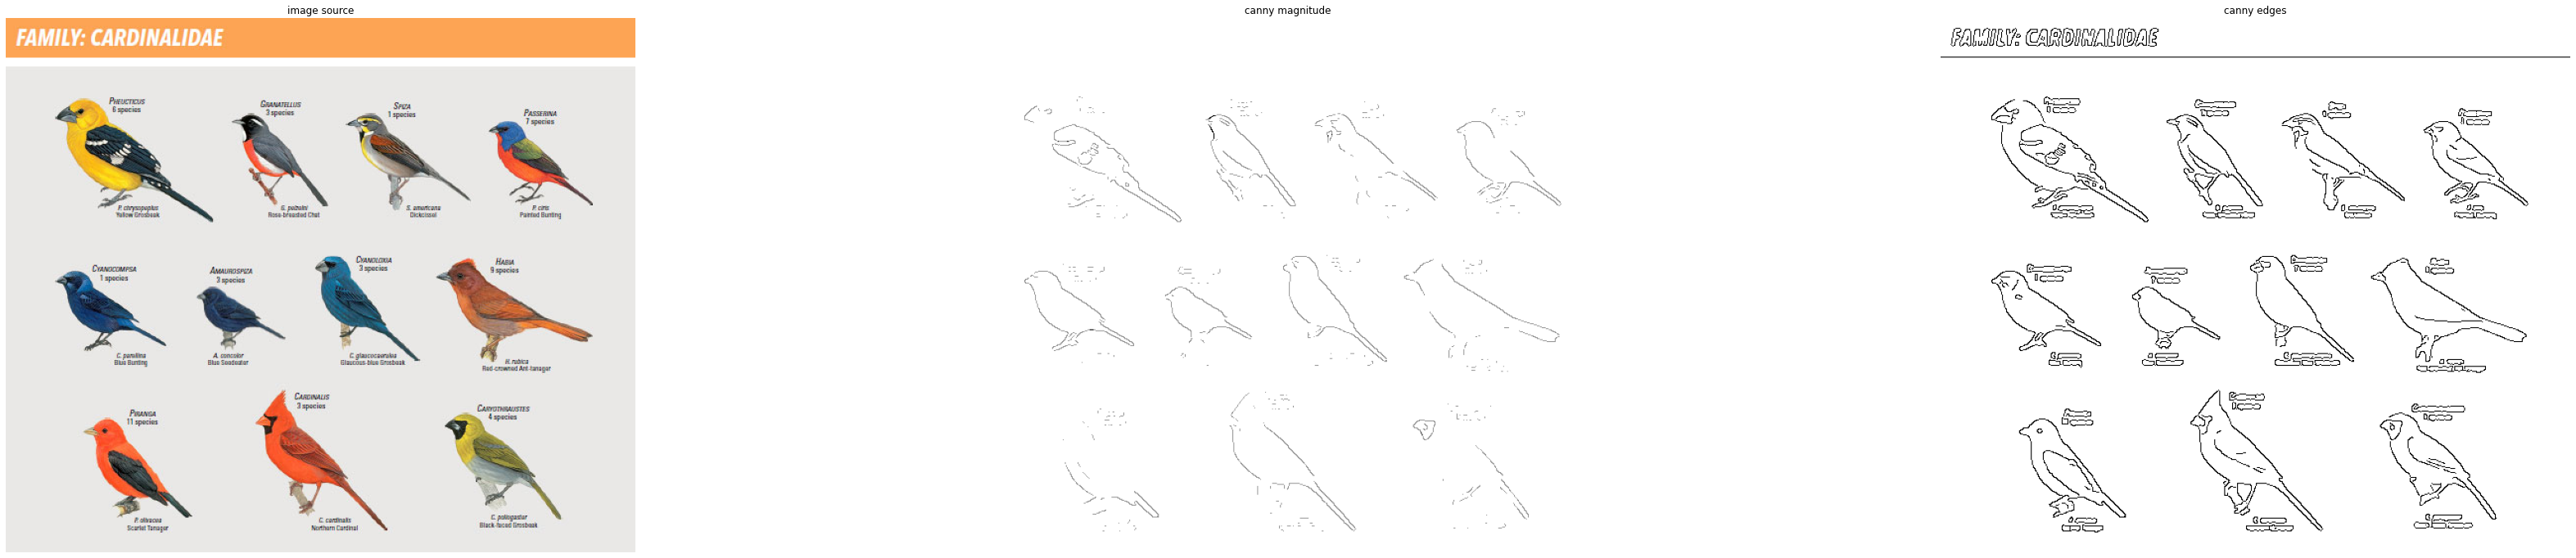

In [9]:
# convert back to numpy
img_magnitude: np.ndarray = kornia.tensor_to_image(x_magnitude.byte())
img_canny: np.ndarray = kornia.tensor_to_image(x_canny.byte())

# Create the plot
fig, axs = plt.subplots(1, 3, figsize=(60, 12))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('image source')
axs[0].imshow(img)

axs[1].axis('off')
axs[1].set_title('canny magnitude')
axs[1].imshow(img_magnitude, cmap='Greys')

axs[2].axis('off')
axs[2].set_title('canny edges')
axs[2].imshow(img_canny, cmap='Greys')

plt.show()

D:\app\Miniconda3\envs\adv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


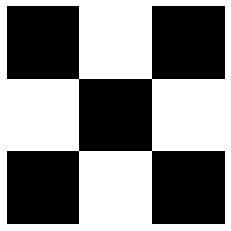

[[0 1 0]
 [0 1 1]
 [0 1 2]
 [1 0 0]
 [1 0 1]
 [1 0 2]
 [1 2 0]
 [1 2 1]
 [1 2 2]
 [2 1 0]
 [2 1 1]
 [2 1 2]]


In [31]:
img_3x3: np.ndarray = np.zeros((3, 3, 3))
img_3x3[0, 1, :] = 255
img_3x3[1, 0, :] = 255

img_3x3[1, 2, :] = 255
img_3x3[2, 1, :] = 255

plt.axis('off')
plt.imshow(img_3x3, interpolation=None, cmap="gray")
plt.show()
# print(img_3x3)
coords = np.column_stack(np.where(img_3x3 == 255))
print(coords)